# Projet de détection de logos

> L\'objectif est de détecter des logos dans des images pour ensuite classifier les documents.
> Nous travaillons sur 

In [2]:
import skimage

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os 
from pdf2image import convert_from_bytes, convert_from_path
from PIL import Image
#import pytesseract
from pdf2image import convert_from_path
import matplotlib.image as mpimg
import re
import pandas as pd
import argparse
import imutils

In [ ]:
path=r'Factures_PDF'  
listelem=[]
listePDF=[]
files=os.listdir(path)

for name in files:
    listelem.append(name)
    
for i in range(0,len(listelem),1):
    if listelem[i][-4:]=='.pdf':
        a=listelem[i]
        listePDF.append(a)
  
pdf = []
n = 1
for i in listePDF:
    imgs = convert_from_path(path+'/'+i, 500, use_pdftocairo=True, strict=False)
    pdf.append(imgs)
    
    for img in imgs :
        for j in range(len(imgs)):
            jpg = img.save('JPG/'+str(i)+'_Page '+str(j+1)+'.jpg', 'JPEG')

listeJPG = []
path=r'out/JPG'
listelem2=[]

files=os.listdir(path)

for name in files:
    listelem2.append(name)
    
for i in range(0,len(listelem2),1):
    if listelem2[i][-4:]=='.jpg':
        a=listelem2[i]
        listeJPG.append(a)

In [ ]:
path=r'JPG/JPG_GRIS'

os.listdir(path)

def get_grayscale(image):

    imgG = mpimg.imread('JPG/'+image,0)
    imgGray = cv2.cvtColor(imgG, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('JPG/JPG_GRIS/'+image, imgGray)
    #plt.imshow(imgGray, cmap = "gray")
    #plt.savefig('JPG/JPG_GRIS/'+image)
    #plt.show

#boucle pour appliquer le gris sur toutes les images
for i in range(len(listeJPG)):
    image_path = listeJPG[i]

    get_grayscale(image_path)

-1

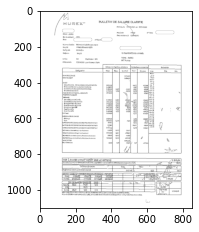

In [17]:
path=r'JPG'

img = cv.imread (path+ '/bulletin_paie_1.pdf_Page 1.jpg' ,0)
img2 = img.copy()
template = cv.imread(path+'/bulletin/B3.png',0)
(tH, tW) = template.shape[:2]
w, h = template.shape[::-1]
# Toutes les 6 méthodes de comparaison dans une liste
methods = [ 'cv.TM_CCOEFF' ]
#methods = [ 'cv.TM_CCOEFF' , 'cv.TM_CCOEFF_NORMED' , 'cv.TM_CCORR' ,
            #'cv.TM_CCORR_NORMED' , 'cv.TM_SQDIFF' , 'cv.TM_SQDIFF_NORMED' ]
found = None

for scale in np.linspace(0.2, 1.0, 20)[::-1]:
    # resize the image according to the scale, and keep track
        # of the ratio of the resizing
    resized = imutils.resize(img, width = int(img.shape[1] * scale))
    r = img.shape[1] / float(resized.shape[1])
    # if the resized image is smaller than the template, then break
    # from the loop
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break
    edged = cv.Canny(resized, 50, 200)
    
    plt.subplot(122),plt.imshow(edged,cmap = 'Greys')
    
    for meth in methods:
        img = img2.copy()
        method = eval(meth)
        # Apply template Matching
        res = cv.matchTemplate(edged,template,method)
        minVal, maxVal, minLoc, maxLoc = cv.minMaxLoc(res)
        
        # if we have found a new maximum correlation value, then update
        # the bookkeeping variable
        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)
            
        # if the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = minLoc
        else:
            top_left = maxLoc
        '''
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img,top_left, bottom_right, (0,255,0) , 2)
        plt.subplot(121),plt.imshow(res,cmap = 'Greys')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'Greys')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)
        plt.show();
        '''
# unpack the bookkeeping variable and compute the (x, y) coordinates
# of the bounding box based on the resized ratio
(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
# draw a bounding box around the detected result and display the image
cv.rectangle(img2, (startX, startY), (endX, endY), (0, 0, 255), 2)
cv.imshow("Image", img2);
cv.waitKey(0)